In [1]:
%matplotlib inline

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
with open("s-weights-nn (3).pickled", "rb") as file_norm:
    data = pickle.load(file_norm)

In [4]:
epochs = np.arange(0, len(data['scores_sw'])) / 8.

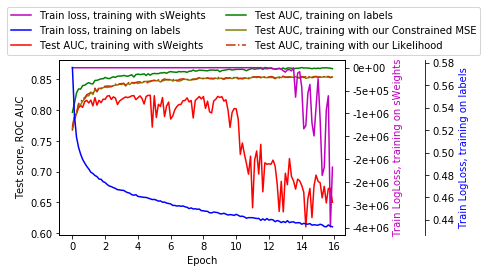

In [10]:
fig, host = plt.subplots(figsize=(7, 3.9))

host.set_xlabel("Epoch")
host.set_ylabel("Test score, ROC AUC")

par1 = host.twinx()
par2 = host.twinx()

par2.spines['right'].set_position(('outward', 80))

train_sw, = par1.plot(epochs, data['losses_sw'].mean(axis=1), color='m',
                       label="Train loss, training with sWeights")

par1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
train_norm, = par2.plot(epochs, data['losses_ref'].mean(axis=1), color='b',#, linestyle="-.",
                       label="Train loss, training on labels")

test_sw, = host.plot(epochs, data['scores_sw'], color='r', label="Test AUC, training with sWeights")
test_norm, = host.plot(epochs, data['scores_ref'], color='g', label="Test AUC, training on labels")
test_reg, =  host.plot(epochs, data['scores_reg'], color=(0.5, 0.5, 0),
                       label="Test AUC, training with our Constrained MSE")
test_pm, =  host.plot(epochs, data['scores_pm'], color=(0.8, 0.2, 0), linestyle="-.",
                       label="Test AUC, training with our Likelihood")

par2.set_ylabel("Train LogLoss, training on labels")
par1.set_ylabel( "Train LogLoss, training on sWeights")
par1.yaxis.label.set_color(train_sw.get_color())
par2.yaxis.label.set_color(train_norm.get_color())

lines = [train_sw, train_norm, test_sw, test_norm, test_reg, test_pm]
labels = [line.get_label() for line in lines]
legend = par2.legend(lines, labels, loc='lower left', bbox_to_anchor=(-0.2, 1), ncol=2)

plt.tight_layout()
fig.savefig("learning_curve.pdf", bbox_inches="tight")

In [6]:
from IPython.display import FileLink

In [7]:
FileLink("learning_curve.pdf")

/mnt/nkazeev/ML-sWeights-experiments/learning_curve.pdf